# 🎉Occasional Sales Analysis
This project analyzes Occasional sales data to understand customer demographics, spending behavior, and popular product categories.

---

## 1. Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
%matplotlib inline
sns.set(style="whitegrid")

## 2. Load Dataset

In [ ]:
sales_data = pd.read_csv('Occasional sales.csv', encoding='unicode_escape')
sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Dataset Overview

In [ ]:
print(sales_data.shape)
print(sales_data.info())

(11251, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


## 3. Data Cleaning

In [ ]:
# Drop unnecessary columns
sales_data.drop(columns=['Status', 'unnamed1'], inplace=True)

# Drop rows with missing values
sales_data.dropna(inplace=True)

# Rename columns for clarity
sales_data.rename(columns={'Amount': 'purchase_amount', 'Orders': 'num_orders'}, inplace=True)

sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,num_orders,purchase_amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


### Summary Statistics

In [ ]:
sales_data.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,num_orders,purchase_amount
count,1.123900e+04,11239,11239,11239,11239,11239.000000,11239.000000,11239,11239,11239,11239,11239.000000,11239.000000
unique,NaN,1250,2350,2,7,NaN,NaN,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7832,4541,NaN,NaN,1944,4289,1583,2655,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.410357,0.420055,NaN,NaN,NaN,NaN,2.489634,9453.610858
std,1.716039e+03,NaN,NaN,NaN,NaN,12.753866,0.493589,NaN,NaN,NaN,NaN,1.114967,5222.355869
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,5443.000000
50%,1.003064e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,1.004426e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000


## 4. Exploratory Data Analysis (EDA)

### Gender-wise Analysis

/tmp/ipython-input-3503756202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='purchase_amount', data=gender_sales, palette='pastel')


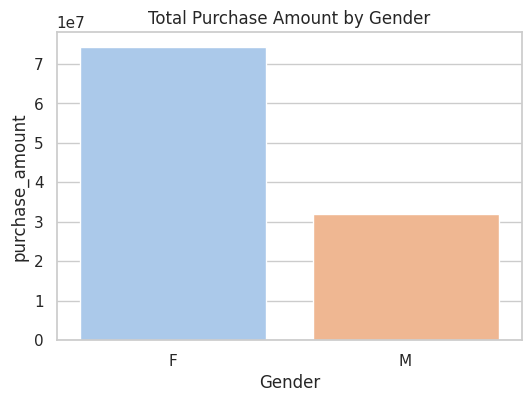

,Gender,purchase_amount
0,F,74335856.43
1,M,31913276.00


In [ ]:
gender_sales = sales_data.groupby('Gender')['purchase_amount'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='purchase_amount', data=gender_sales, palette='pastel')
plt.title('Total Purchase Amount by Gender')
plt.show()

gender_sales

### Age Group Analysis

/tmp/ipython-input-2817169221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='purchase_amount', data=age_sales, palette='muted')


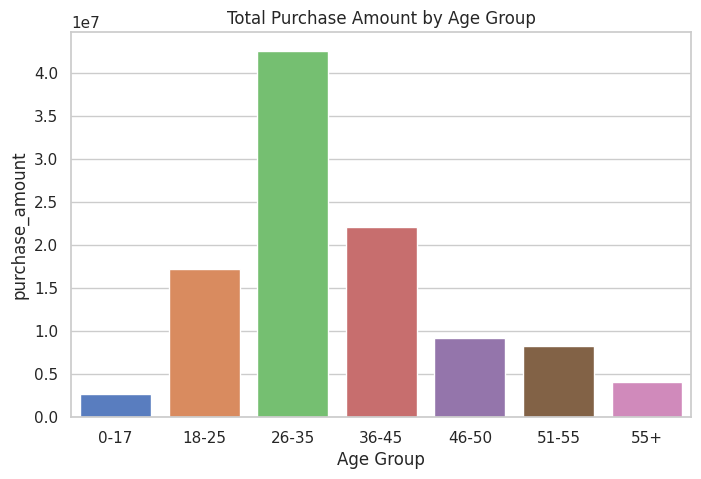

,Age Group,purchase_amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


In [ ]:
age_sales = sales_data.groupby('Age Group')['purchase_amount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='purchase_amount', data=age_sales, palette='muted')
plt.title('Total Purchase Amount by Age Group')
plt.show()

age_sales

### Occupation Analysis

/tmp/ipython-input-525237081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchase_amount', y='Occupation', data=occupation_sales.sort_values(by='purchase_amount', ascending=False), palette='deep')


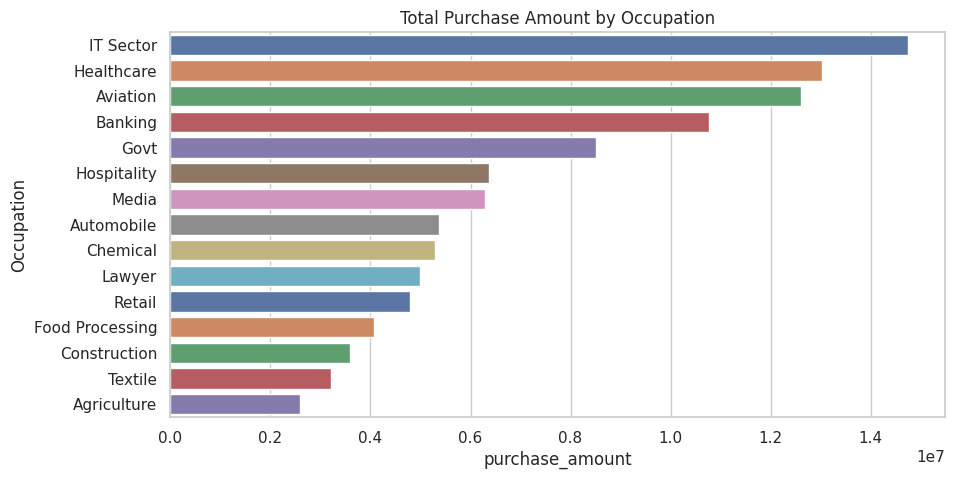

,Occupation,purchase_amount
0,Agriculture,2593087.00
1,Automobile,5368596.00
2,Aviation,12602298.00
3,Banking,10770610.95
4,Chemical,5297436.00
5,Construction,3597511.00
6,Food Processing,4070670.00
7,Govt,8517212.00
8,Healthcare,13034587.49
9,Hospitality,6376405.00


In [ ]:
occupation_sales = sales_data.groupby('Occupation')['purchase_amount'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='purchase_amount', y='Occupation', data=occupation_sales.sort_values(by='purchase_amount', ascending=False), palette='deep')
plt.title('Total Purchase Amount by Occupation')
plt.show()

occupation_sales

### State-wise Analysis

/tmp/ipython-input-2044359251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchase_amount', y='State', data=state_sales, palette='coolwarm')


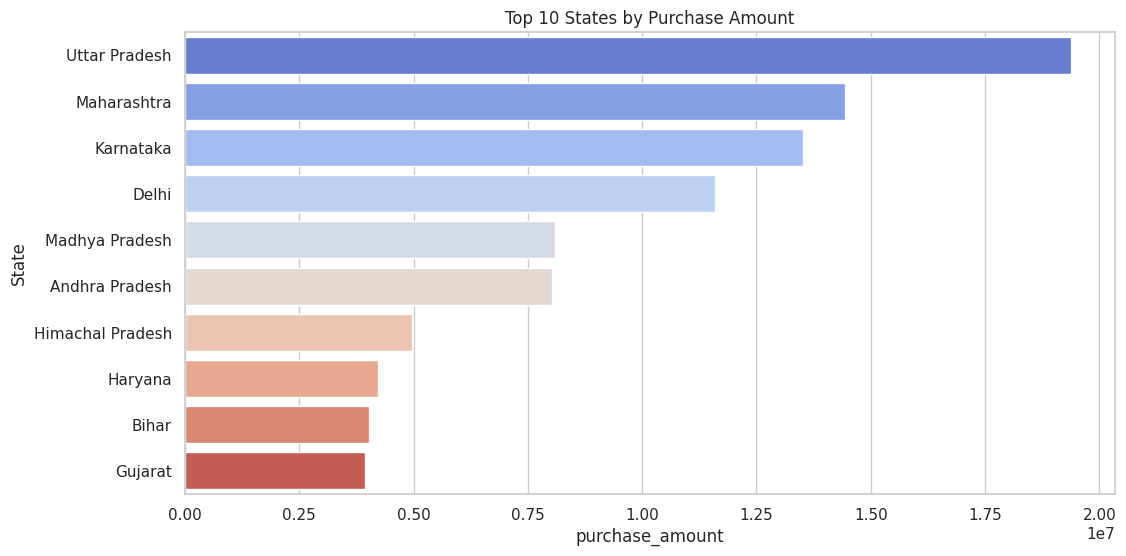

,State,purchase_amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


In [ ]:
state_sales = sales_data.groupby('State')['purchase_amount'].sum().reset_index().sort_values(by='purchase_amount', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='purchase_amount', y='State', data=state_sales, palette='coolwarm')
plt.title('Top 10 States by Purchase Amount')
plt.show()

state_sales

### Product Category Analysis

/tmp/ipython-input-553993700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchase_amount', y='Product_Category', data=category_sales, palette='viridis')


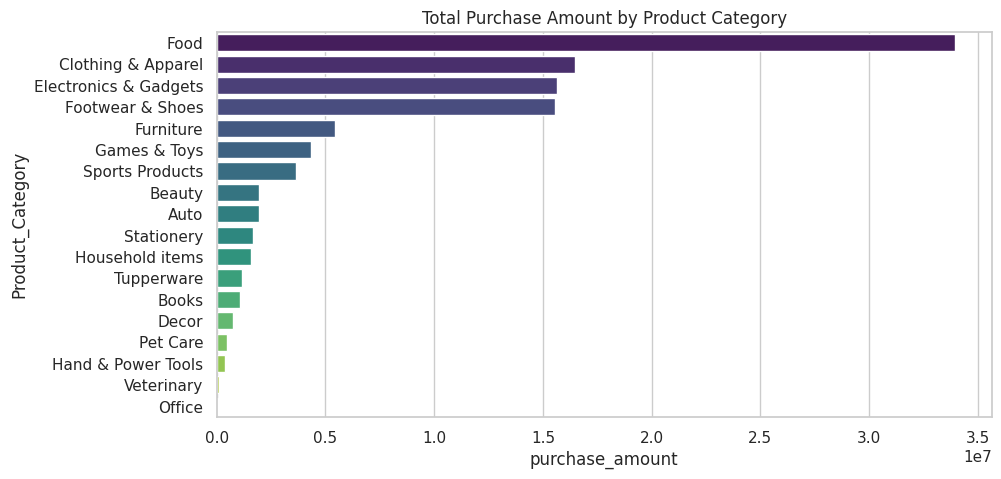

,Product_Category,purchase_amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


In [ ]:
category_sales = sales_data.groupby('Product_Category')['purchase_amount'].sum().reset_index().sort_values(by='purchase_amount', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='purchase_amount', y='Product_Category', data=category_sales, palette='viridis')
plt.title('Total Purchase Amount by Product Category')
plt.show()

category_sales

### Gender Distribution (Pie Chart)

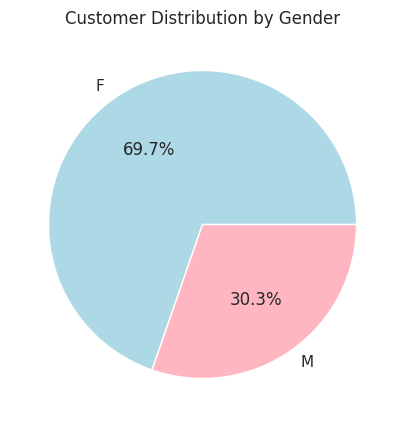

In [ ]:
gender_counts = sales_data['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue','lightpink'])
plt.title('Customer Distribution by Gender')
plt.show()

### Age Group Distribution (Pie Chart)

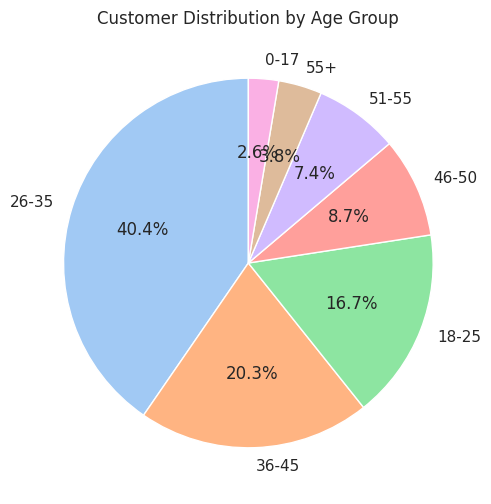

In [ ]:
age_counts = sales_data['Age Group'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Age Group')
plt.show()

### Box Plot: Purchase Amount by Gender

/tmp/ipython-input-1740916191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='purchase_amount', data=sales_data, palette='Set2')


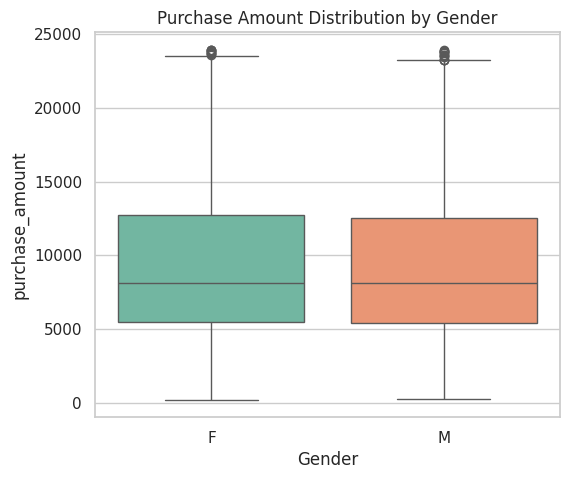

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='purchase_amount', data=sales_data, palette='Set2')
plt.title('Purchase Amount Distribution by Gender')
plt.show()

### Box Plot: Purchase Amount by Age Group

/tmp/ipython-input-432139131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='purchase_amount', data=sales_data, palette='Set3')


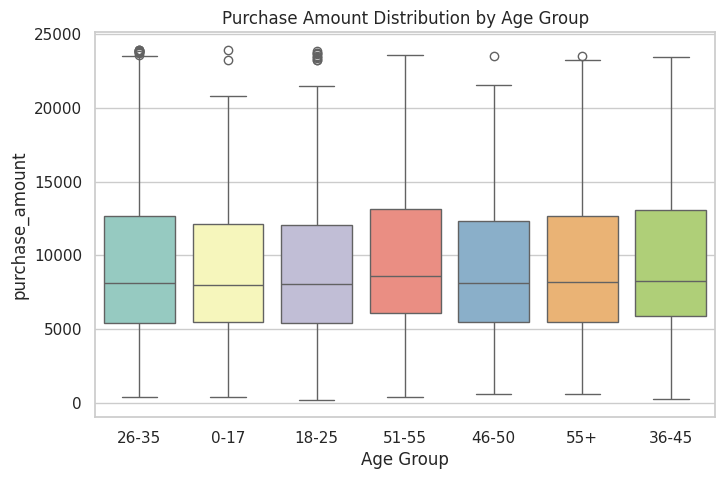

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Age Group', y='purchase_amount', data=sales_data, palette='Set3')
plt.title('Purchase Amount Distribution by Age Group')
plt.show()

## 5. Key Insights & Conclusion
- Most of the buyers are **female**, but males also contribute significantly.
- The age group **26-35** spends the most.
- **IT, Healthcare, and Aviation** professionals are the top buyers.
- States like **Uttar Pradesh, Maharashtra, and Karnataka** contribute the most sales.
- Popular product categories include **Clothing, Food, and Electronics**.

---
This analysis can help businesses focus marketing campaigns and stock planning for Occasional season.